# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [1]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_0.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

List of all features ordered by correlation to `ypct`:

In [2]:
c = df[df.columns.drop(labels=['top100', 'year'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].to_string())

ypct                                 1.000000
ego_previous_votes_maximum           0.719447
ego_previous_votes_mean              0.712679
ego_previous_votes_median            0.712098
team_previous_votes                  0.692211
ego_previous_votes_minimum           0.584259
ego_previous_rating_std_dev          0.513252
team_closeness                       0.396702
team_size                            0.391165
ego_closeness_maximum                0.382114
ego_closeness_minimum                0.373092
ego_closeness_mean                   0.367128
ego_network_constraint_mean         -0.350727
ego_closeness_median                 0.349634
pair_shared_collaborators_maximum    0.334396
ego_network_constraint_median       -0.330111
pair_shared_collaborators_mean       0.328919
pair_shared_collaborators_minimum    0.325746
team_network_constraint             -0.320460
pair_shared_collaborators_median     0.318725
pair_neighbour_overlap_std_dev       0.313526
ego_previous_rating_minimum       

## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

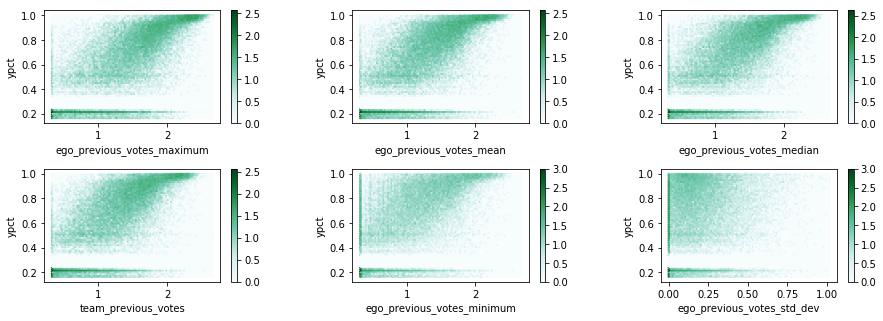

In [3]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

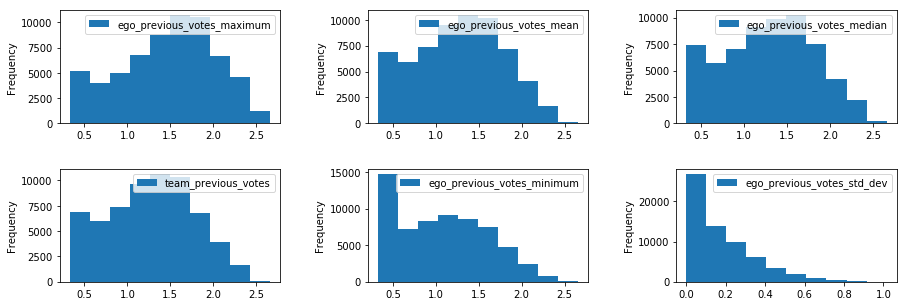

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

Plot with boxplots of `ego_previous_votes_maximum` every year:

In [5]:
dfx[f[:-2]].corr()

,ego_previous_votes_maximum,ego_previous_votes_mean,ego_previous_votes_median,team_previous_votes,ego_previous_votes_minimum,ego_previous_votes_std_dev
ego_previous_votes_maximum,1.000000,0.938211,0.925764,0.910455,0.729755,0.382723
ego_previous_votes_mean,0.938211,1.000000,0.988897,0.962945,0.909607,0.056814
ego_previous_votes_median,0.925764,0.988897,1.000000,0.954324,0.873927,0.084981
team_previous_votes,0.910455,0.962945,0.954324,1.000000,0.865935,0.080959
ego_previous_votes_minimum,0.729755,0.909607,0.873927,0.865935,1.000000,-0.339744
ego_previous_votes_std_dev,0.382723,0.056814,0.084981,0.080959,-0.339744,1.000000


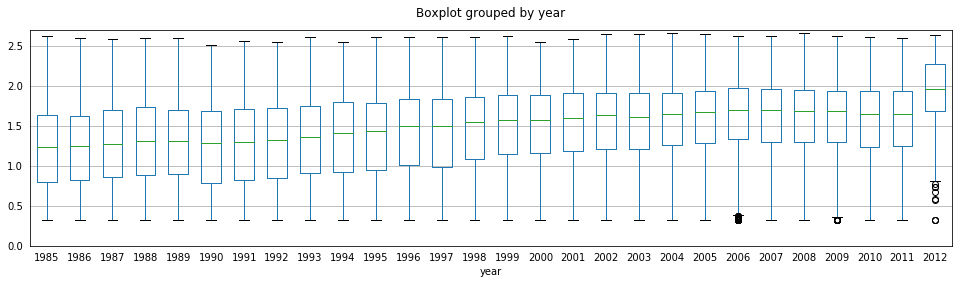

In [6]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_votes_maximum', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 2.7)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Previous Ratings

Scatter plot of `previous_ratings` features and `ypct`:

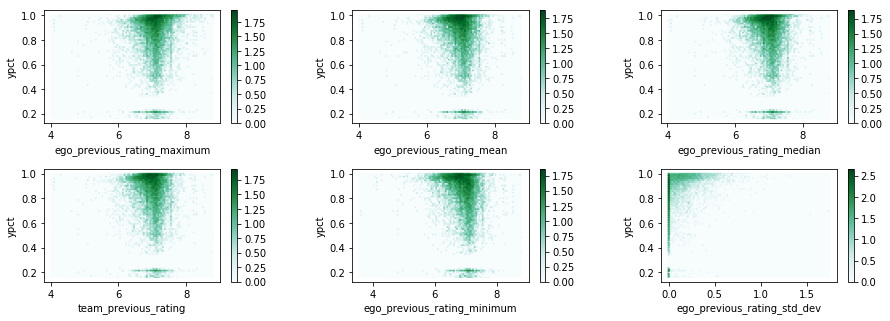

In [7]:
f = ['ego_previous_rating_maximum',
'ego_previous_rating_mean',
'ego_previous_rating_median',
'team_previous_rating',
'ego_previous_rating_minimum',
'ego_previous_rating_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

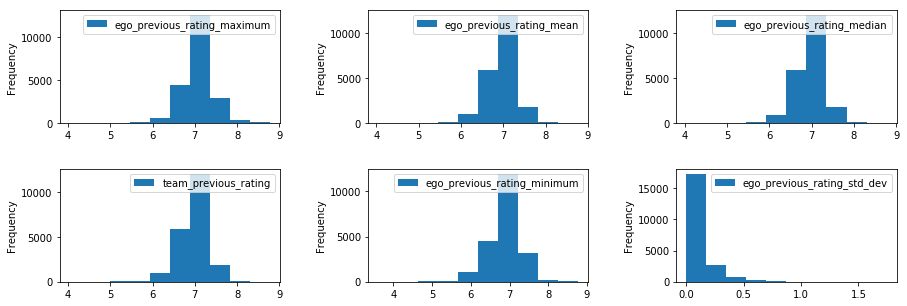

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [9]:
dfx[f[:-2]].corr()

,ego_previous_rating_maximum,ego_previous_rating_mean,ego_previous_rating_median,team_previous_rating,ego_previous_rating_minimum,ego_previous_rating_std_dev
ego_previous_rating_maximum,1.000000,0.897000,0.875881,0.876540,0.666045,0.284422
ego_previous_rating_mean,0.897000,1.000000,0.989034,0.974736,0.917041,-0.149876
ego_previous_rating_median,0.875881,0.989034,1.000000,0.965253,0.893229,-0.143806
team_previous_rating,0.876540,0.974736,0.965253,1.000000,0.890309,-0.137859
ego_previous_rating_minimum,0.666045,0.917041,0.893229,0.890309,1.000000,-0.515313
ego_previous_rating_std_dev,0.284422,-0.149876,-0.143806,-0.137859,-0.515313,1.000000


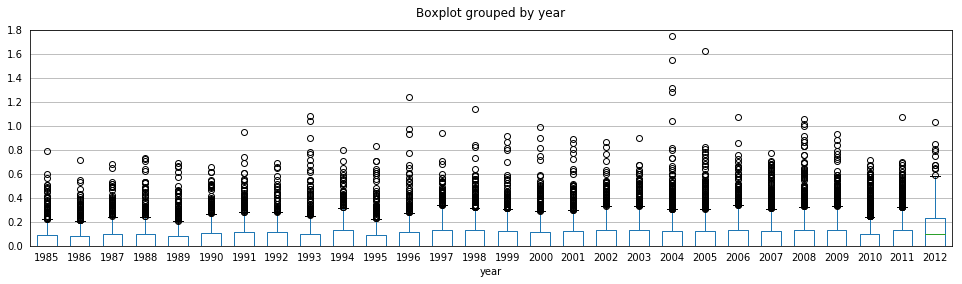

In [10]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_std_dev', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 1.8)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

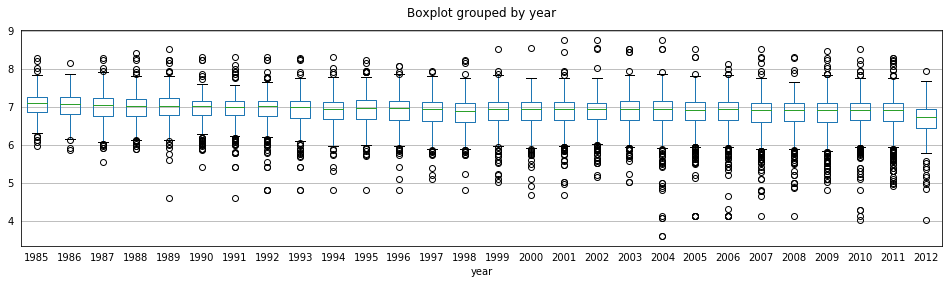

In [11]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_minimum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Closeness

Scatter plot of `closeness` features and `ypct`:

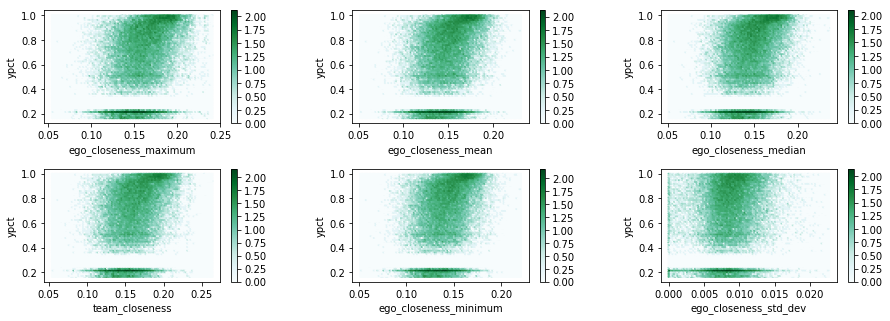

In [12]:
f = ['ego_closeness_maximum',
'ego_closeness_mean',
'ego_closeness_median',
'team_closeness',
'ego_closeness_minimum',
'ego_closeness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

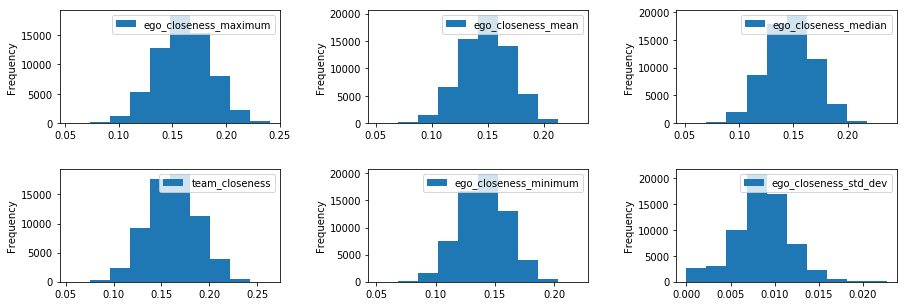

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [14]:
dfx[f[:-2]].corr()

,ego_closeness_maximum,ego_closeness_mean,ego_closeness_median,team_closeness,ego_closeness_minimum,ego_closeness_std_dev
ego_closeness_maximum,1.000000,0.980823,0.946552,0.995921,0.968840,0.631809
ego_closeness_mean,0.980823,1.000000,0.987483,0.985049,0.989563,0.521805
ego_closeness_median,0.946552,0.987483,1.000000,0.955646,0.968830,0.467157
team_closeness,0.995921,0.985049,0.955646,1.000000,0.974571,0.593017
ego_closeness_minimum,0.968840,0.989563,0.968830,0.974571,1.000000,0.437358
ego_closeness_std_dev,0.631809,0.521805,0.467157,0.593017,0.437358,1.000000


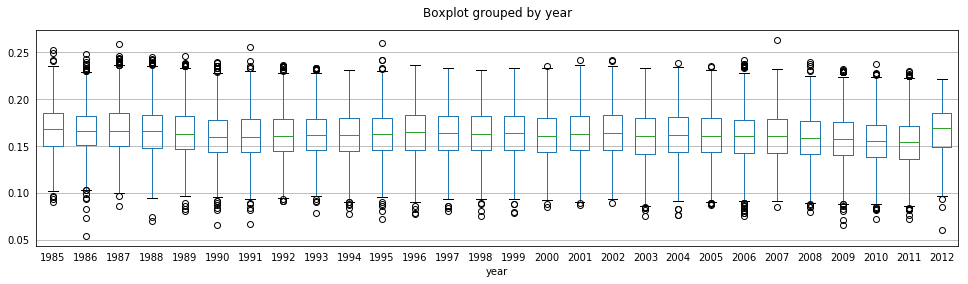

In [15]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_closeness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Team Size

Scatter plot of `team_size` and `ypct`:

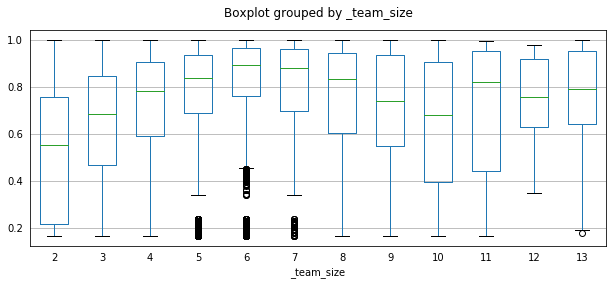

In [16]:
df['_team_size'] = df.team_size.map(lambda x: x if x < 13 else 13)
ax = df.boxplot('ypct', by='_team_size', figsize=(10,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

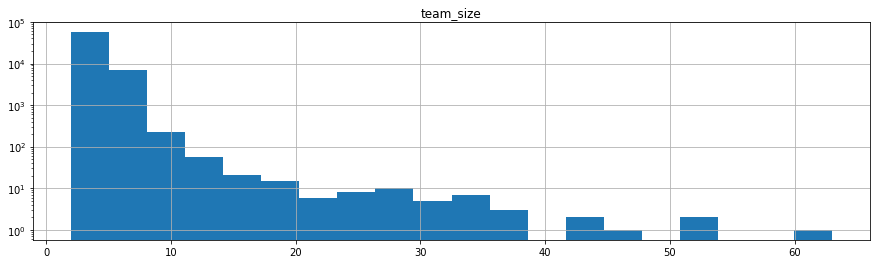

In [17]:
ax = df.hist('team_size', log=True, bins=20, figsize=(15,4))

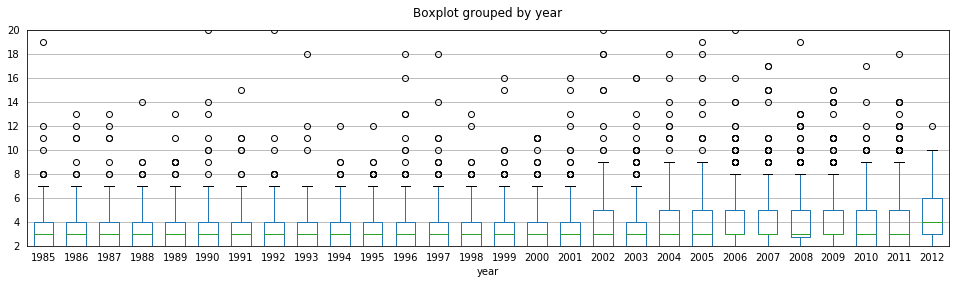

In [18]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_size', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(2, 20)
ax.xaxis.grid(False)

## Network Constraint

Scatter plot of `network_constraint` features and `ypct`:

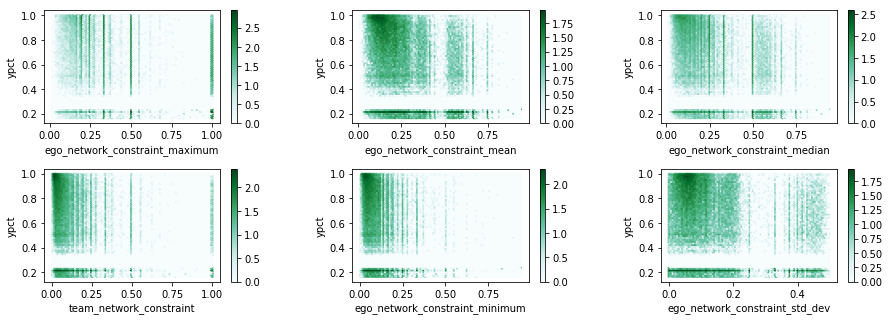

In [19]:
f = ['ego_network_constraint_maximum',
'ego_network_constraint_mean',
'ego_network_constraint_median',
'team_network_constraint',
'ego_network_constraint_minimum',
'ego_network_constraint_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

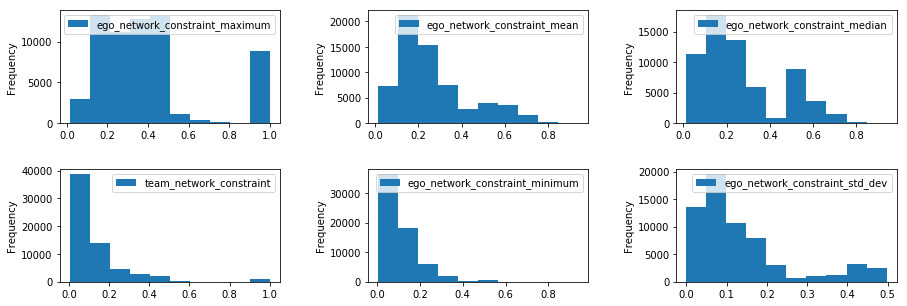

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [21]:
dfx[f[:-2]].corr()

,ego_network_constraint_maximum,ego_network_constraint_mean,ego_network_constraint_median,team_network_constraint,ego_network_constraint_minimum,ego_network_constraint_std_dev
ego_network_constraint_maximum,1.000000,0.948365,0.864628,0.418234,0.473361,0.945564
ego_network_constraint_mean,0.948365,1.000000,0.962209,0.612955,0.680671,0.816626
ego_network_constraint_median,0.864628,0.962209,1.000000,0.596881,0.635626,0.742929
team_network_constraint,0.418234,0.612955,0.596881,1.000000,0.860350,0.156741
ego_network_constraint_minimum,0.473361,0.680671,0.635626,0.860350,1.000000,0.170932
ego_network_constraint_std_dev,0.945564,0.816626,0.742929,0.156741,0.170932,1.000000


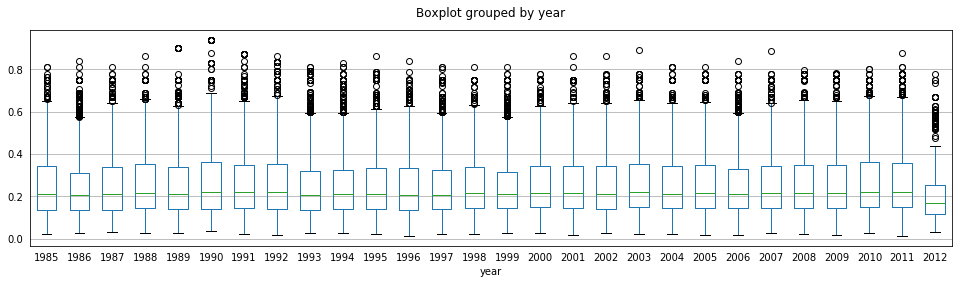

In [22]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_network_constraint_mean', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Shared Collaborators in Pairs

Scatter plot of `pair_shared_collaborators` features and `ypct`:

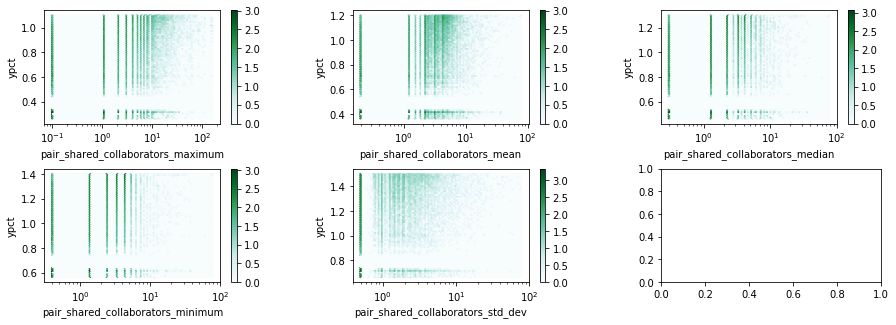

In [23]:
f = ['pair_shared_collaborators_maximum',
'pair_shared_collaborators_mean',
'pair_shared_collaborators_median',
'pair_shared_collaborators_minimum',
'pair_shared_collaborators_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log', xscale='log')    

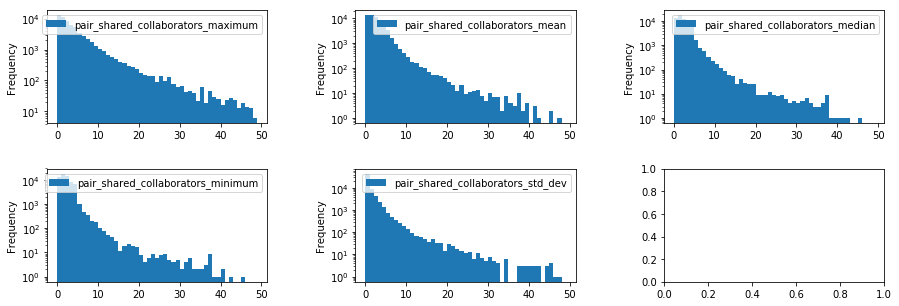

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], bins=range(0,50), logy=True)

In [27]:
dfx[f[:-2]].corr()

,pair_shared_collaborators_maximum,pair_shared_collaborators_mean,pair_shared_collaborators_median,pair_shared_collaborators_minimum,pair_shared_collaborators_std_dev
pair_shared_collaborators_maximum,1.000000,0.792935,0.530900,0.445745,0.930548
pair_shared_collaborators_mean,0.792935,1.000000,0.898279,0.836010,0.646672
pair_shared_collaborators_median,0.530900,0.898279,1.000000,0.943020,0.286970
pair_shared_collaborators_minimum,0.445745,0.836010,0.943020,1.000000,0.170796
pair_shared_collaborators_std_dev,0.930548,0.646672,0.286970,0.170796,1.000000


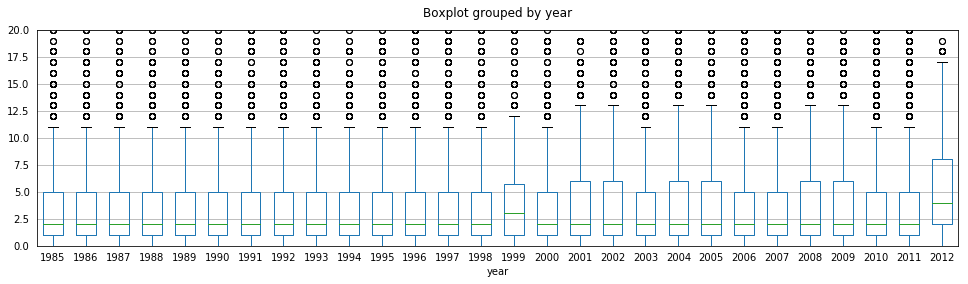

In [25]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_shared_collaborators_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 20)
ax.xaxis.grid(False)

Neighbor Overlap in Pairs

Degree

Past Experience

Betweenness 

Clustering

Square Clustering